In [1]:
import pytorch_lightning as pl
import torch
import numpy as np
from torch.utils.data import DataLoader  # Import DataLoader
from src.failure_model import ToxicClassifier
from src.datasets import PromptOnlyDataset, PropDataset
import torch._dynamo

torch._dynamo.config.suppress_errors = True

try:
    torch.multiprocessing.set_start_method("spawn")
except RuntimeError:
    pass

In [2]:
# load model and data

ds_cal = PromptOnlyDataset("data/rtp_500/split_1_0.5_0.1_0.2_0.2/cal.pkl")
ds_test = PropDataset("data/rtp_500/split_1_0.5_0.1_0.2_0.2/test.pkl", score_name="toxicity", threshold=0.5)
dl_test = DataLoader(ds_test, batch_size=1500, shuffle=False)

# ds_cal.data = ds_cal.data[:1500]

model = ToxicClassifier.load_from_checkpoint("saved/Jigsaw_BERT/lightning_logs/version_1/checkpoints/epoch=4-step=970.ckpt")
_ = model.eval()

In [3]:
# global config

target_taus = torch.tensor([0.1])

tau_space = np.logspace(-8, -0.33, 500)
taus = torch.tensor(tau_space)

target_tau_idx = torch.argmin(torch.abs(taus - target_taus))

model.set_taus(taus)
model.set_min_p_for_q_tau(1e-20)

In [4]:
from src import utils

# Create the parameter dictionary for the rating backend.
rater_params = {
    "model_type": "original",
    "amp": True,
}

# Get the Hugging Face key.
hf_key = utils.api_key_from_file("HF_KEY.txt")

# Create the parameter dictionary for the generation backend.
generator_params = {
    "model_name": "meta-llama/Llama-3.2-1B",
    "hub_token": hf_key,
    "max_input_tokens": 40,
    "max_output_tokens": 30,
    "torch_dtype": torch.bfloat16,
    # If you need to specify the attention implementation, uncomment the line below.
    # "attn_implementation": "flash_attention_2",
}

/home/fre.gilad/miniforge3/envs/vllm4/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fre.gilad/miniforge3/envs/vllm4/lib/python3.11 ...
You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fre.gilad/miniforge3/envs/vllm4/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, un

Predicting: |          | 0/? [00:00<?, ?it/s]

GPU 0 processing 19888 prompts
INFO 04-30 14:53:11 [__init__.py:239] Automatically detected platform cuda.
INFO: Overhead tokens:  100
INFO: Empty input tokens:  1
INFO: Total sequence tokens:  71
INFO 04-30 14:53:33 [config.py:585] This model supports multiple tasks: {'reward', 'generate', 'score', 'embed', 'classify'}. Defaulting to 'generate'.
INFO 04-30 14:53:33 [config.py:1697] Chunked prefill is enabled with max_num_batched_tokens=106600.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO 04-30 14:53:37 [core.py:54] Initializing a V1 LLM engine (v0.8.2) with config: model='meta-llama/Llama-3.2-1B', speculative_config=None, tokenizer='meta-llama/Llama-3.2-1B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=171, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar', reasoning_backend=None), observability_config=ObservabilityConfig(show_hidden_metrics=False, otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=None, served_model_name=meta-llama/Llama-3.2-1B, num_scheduler_steps=1, multi_step_stream_outputs=True, enable_prefix_caching=True, chunked_prefill_enabled=True, use_

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.84it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.84it/s]



INFO 04-30 14:53:41 [loader.py:447] Loading weights took 0.64 seconds
INFO 04-30 14:53:41 [gpu_model_runner.py:1186] Model loading took 2.3185 GB and 2.357437 seconds
INFO 04-30 14:53:48 [backends.py:415] Using cache directory: /home/fre.gilad/.cache/vllm/torch_compile_cache/8ea18a64bd/rank_0_0 for vLLM's torch.compile
INFO 04-30 14:53:48 [backends.py:425] Dynamo bytecode transform time: 7.14 s
INFO 04-30 14:53:49 [backends.py:115] Directly load the compiled graph for shape None from the cache
INFO 04-30 14:53:53 [monitor.py:33] torch.compile takes 7.14 s in total
INFO 04-30 14:53:55 [kv_cache_utils.py:566] GPU KV cache size: 432,448 tokens
INFO 04-30 14:53:55 [kv_cache_utils.py:569] Maximum concurrency for 171 tokens per request: 2528.94x
INFO 04-30 14:54:13 [gpu_model_runner.py:1534] Graph capturing finished in 18 secs, took 0.90 GiB
INFO 04-30 14:54:13 [core.py:151] init engine (profile, create kv cache, warmup model) took 32.39 seconds


Processing Prompts: 100%|██████████| 19888/19888 [05:29<00:00, 60.31it/s, batch_num=107, batch_time=0.62, time_remaining=733 days, 15:43:34] 


tau: 1e-08, miscoverage: 0.0000
tau: 1.0360262073704321e-08, miscoverage: 0.0000
tau: 1.0733503023583638e-08, miscoverage: 0.0000
tau: 1.1120190429322422e-08, miscoverage: 0.0000
tau: 1.1520808715727908e-08, miscoverage: 0.0000
tau: 1.1935859759595804e-08, miscoverage: 0.0000
tau: 1.2365863518439399e-08, miscoverage: 0.0000
tau: 1.2811358681869184e-08, miscoverage: 0.0000
tau: 1.3272903346439188e-08, miscoverage: 0.0000
tau: 1.3751075714805737e-08, miscoverage: 0.0000
tau: 1.424647482007384e-08, miscoverage: 0.0000
tau: 1.4759721276239462e-08, miscoverage: 0.0000
tau: 1.5291458055667073e-08, miscoverage: 0.0000
tau: 1.5842351294576797e-08, miscoverage: 0.0000
tau: 1.641309112755049e-08, miscoverage: 0.0000
tau: 1.7004392552101422e-08, miscoverage: 0.0000
tau: 1.761699632439166e-08, miscoverage: 0.0000
tau: 1.825166988721837e-08, miscoverage: 0.0000
tau: 1.890920833143197e-08, miscoverage: 0.0000
tau: 1.9590435391990882e-08, miscoverage: 0.0000
tau: 2.0296204479899798e-08, miscoverage: 

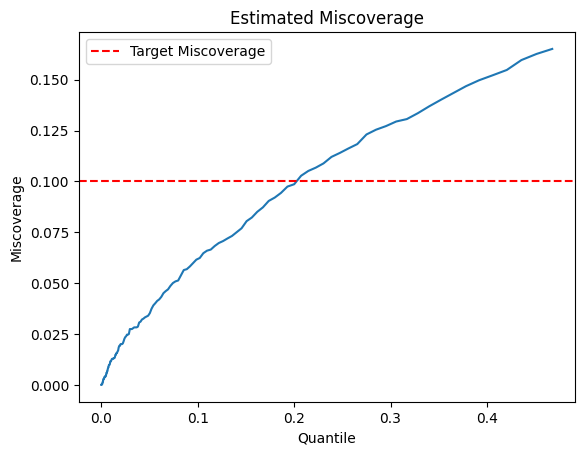

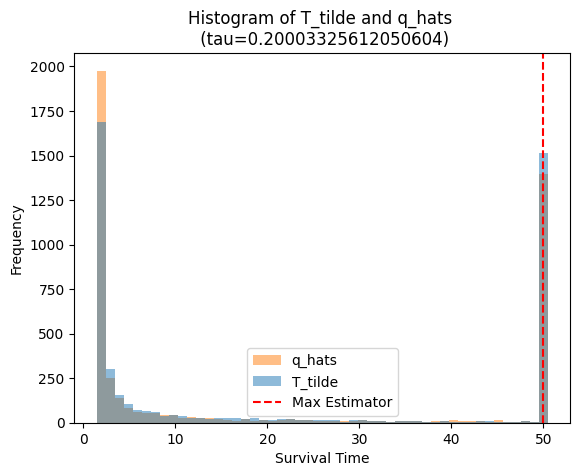

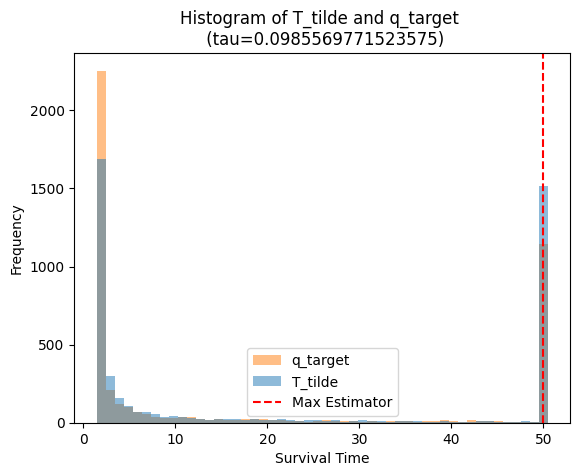

In [5]:
from src.conformal import conformalize

# tau_hat, max_est, q_hat = conformalize(
#     trainer=pl.Trainer(),
#     model=model,
#     target_taus=target_taus,
#     canidate_taus=taus,
#     X=ds_prompt_only,
#     generator_params=generator_params,
#     rater_params=rater_params,
#     budget_per_sample=1000,
#     share_budget=True,
#     min_sample_size=1,
#     text_prep_func="sentence_completion",
#     multi_gpu=True,
#     # plot=True,
#     # return_extra=True,
# )

result_tuple = conformalize(
    trainer=pl.Trainer(),
    model=model,
    target_taus=target_taus,
    canidate_taus=taus,
    X=ds_cal,
    generator_params=generator_params,
    rater_params=rater_params,
    budget_per_sample=5,
    share_budget=True,
    min_sample_size=0.1,
    naive=False,
    text_prep_func="sentence_completion",
    multi_gpu=True,
    plot=True,
    return_extra=True,
    batch_size=1500,
)

(
    tau_hat, # chosen tau for the target miscoverage
    max_est, # maximum quantile prediction
    q_hats, # quantile predictions for the chosen tau
    T_tilde, # sampled survival time for all samples
    C, # censoring time indicator
    quantile_est, # predicted quantile estimates for all taus
    prior_quantile_est, # each output is sampled at most prior_quantile_est times 
    C_probs, # sampling probability of each sample
    weights, # weights used for the weighted miscoverage
    miscoverage, # actual miscoverage rate for the GT dist
) = result_tuple

In [ ]:
tau_hat_idx = np.argmin(torch.abs(taus - tau_hat)).item()

print("Tau Hat:", tau_hat)
print("Tau Hat Miscoverage:", miscoverage[tau_hat_idx].item())
print("Max Est:", max_est)

quant_pred = quantile_est[:, target_tau_idx]

# Print the average prediction for tau=tau_hat
print("Avg prediction for tau_hat:", np.mean(q_hats.clip(max=max_est)))
print("Avg prediction for tau=0.1:", np.mean(quant_pred))

AttributeError: 'float' object has no attribute 'item'